## **Foopd Security In Burundi**

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('./burundi_food_security.csv')

# Display the first few rows of the DataFrame
df.head()


,Crop,Area Cultivated (ha),Yield (tons/ha),Environmental Threat,Impact Severity,Food Security Index,Year,Location,Soil Quality,Flooding Risk,Soil Degradation,Farming Practice
0,Coffee,75.0,7.89,Drought,Low,20.58,2015,Muramvya,Average,0,1,Modern
1,Coffee,75.0,7.89,Drought,Low,20.58,2015,Ngozi,Average,0,0,Modern
2,Coffee,75.0,7.89,Drought,Low,20.58,2015,Muramvya,Good,1,1,Modern
3,Coffee,75.0,7.89,Drought,Low,20.58,2015,Gitega,Average,0,0,Modern
4,Coffee,75.0,7.89,Drought,Low,20.58,2015,Makamba,Average,1,0,Modern


#### Interpretation

The dataset contains information on the impacts of environmental threats on food security in Burundi. It includes features such as crop type, area cultivated, yield, environmental threats, and food security index, among others.

In [14]:
# Summary statistics
df.describe()

,Area Cultivated (ha),Yield (tons/ha),Food Security Index,Year,Flooding Risk,Soil Degradation
count,541600.000000,543000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,51.852843,5.508053,49.118770,2019.500000,0.500167,0.491167
std,27.576071,2.551192,28.843944,2.872284,0.500000,0.499922
min,5.000000,1.000000,0.000000,2015.000000,0.000000,0.000000
25%,28.000000,3.290000,23.670000,2017.000000,0.000000,0.000000
50%,51.000000,5.540000,49.055000,2019.500000,1.000000,0.000000
75%,76.000000,7.670000,74.072500,2022.000000,1.000000,1.000000
max,99.000000,9.990000,99.980000,2024.000000,1.000000,1.000000


#### Interpretation

The summary statistics provide an overview of the numerical features in the dataset. Key metrics such as the mean, standard deviation, minimum, and maximum values are shown for each numerical column. For instance, we can see the average yield across crops, which helps assess overall productivity.

In [15]:
# Identifying missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage
Area Cultivated (ha),58400,9.733333
Yield (tons/ha),57000,9.500000
Soil Quality,58100,9.683333


#### Interpretation

The analysis of missing values reveals the columns that contain null values and their corresponding percentages. Identifying these missing values is crucial for deciding on appropriate data cleaning techniques.

In [16]:
# Handling missing values by imputing with the median for numerical columns
df['Area Cultivated (ha)'].fillna(df['Area Cultivated (ha)'].median(), inplace=True)
df['Yield (tons/ha)'].fillna(df['Yield (tons/ha)'].median(), inplace=True)
df['Food Security Index'].fillna(df['Food Security Index'].median(), inplace=True)

# Check again for missing values
df.isnull().sum()

Crop                        0
Area Cultivated (ha)        0
Yield (tons/ha)             0
Environmental Threat        0
Impact Severity             0
Food Security Index         0
Year                        0
Location                    0
Soil Quality            58100
Flooding Risk               0
Soil Degradation            0
Farming Practice            0
dtype: int64

#### Interpretation

The missing values in the numerical columns have been filled using the median, which is a robust method to handle missing data without significantly skewing the results. After this operation, we verify that there are no more missing values in the key columns.

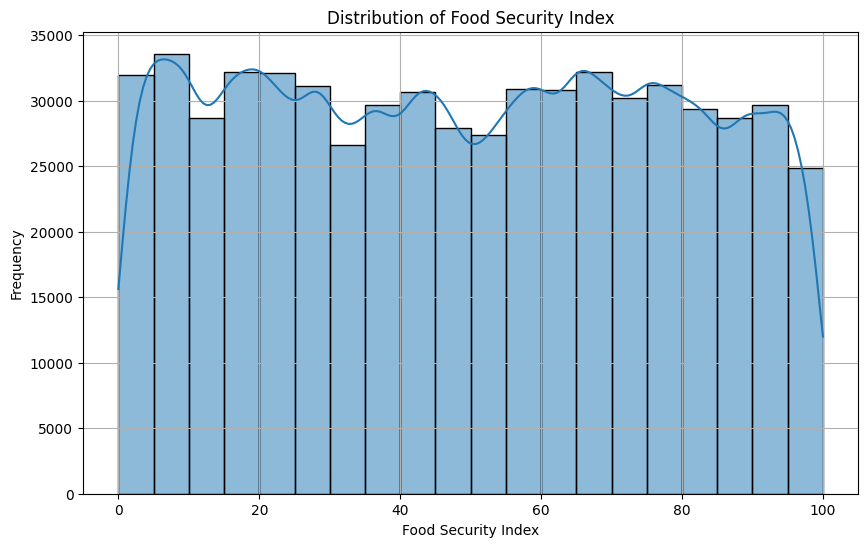

In [17]:
# Visualizing the distribution of Food Security Index
plt.figure(figsize=(10, 6))
sns.histplot(df['Food Security Index'], bins=20, kde=True)
plt.title('Distribution of Food Security Index')
plt.xlabel('Food Security Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Interpretation

The histogram shows the distribution of the Food Security Index across the dataset. The kernel density estimate (KDE) overlay provides a smooth estimate of the distribution. A noticeable skewness can indicate that a significant portion of the population may be experiencing lower food security.

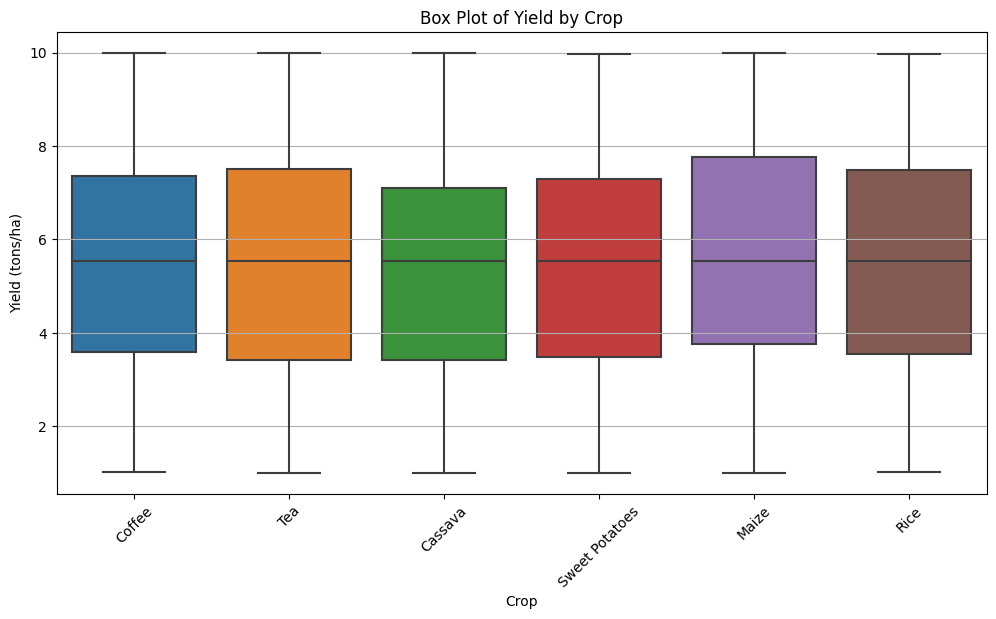

In [18]:
# Box plot of Yield by Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield (tons/ha)', data=df)
plt.title('Box Plot of Yield by Crop')
plt.ylabel('Yield (tons/ha)')
plt.xlabel('Crop')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Interpretation

The box plot illustrates the distribution of yields for each crop. It allows us to identify the median yield and any potential outliers for each type of crop. Crops with a wide interquartile range may indicate variability in production, which could be influenced by environmental factors.

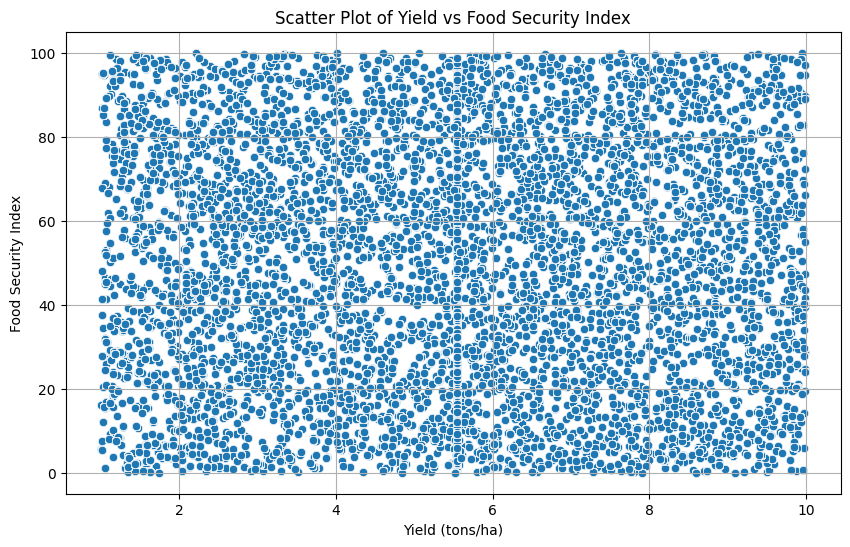

In [19]:
# Scatter plot of Yield vs Food Security Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yield (tons/ha)', y='Food Security Index', data=df)
plt.title('Scatter Plot of Yield vs Food Security Index')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Food Security Index')
plt.grid(True)
plt.show()

#### Interpretation

The scatter plot examines the relationship between yield and food security index. A positive correlation may suggest that higher yields contribute to better food security. Analyzing this relationship can provide insights into how agricultural productivity impacts overall food stability.

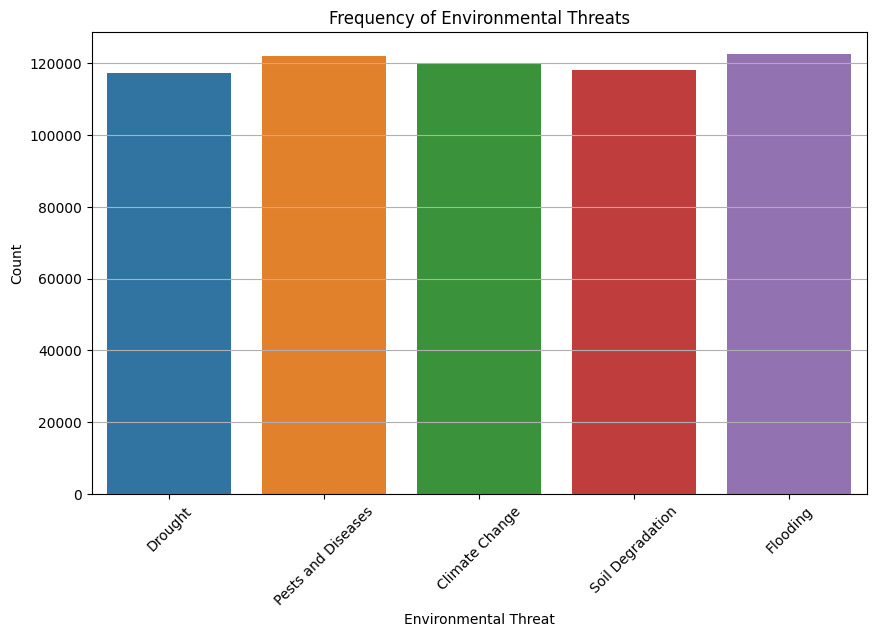

In [20]:
# Bar chart for frequency of Environmental Threats
plt.figure(figsize=(10, 6))
sns.countplot(x='Environmental Threat', data=df)
plt.title('Frequency of Environmental Threats')
plt.xlabel('Environmental Threat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Interpretation

The bar chart displays the frequency of different environmental threats affecting food security. Identifying the most common threats can help stakeholders prioritize interventions and resources to mitigate these challenges.

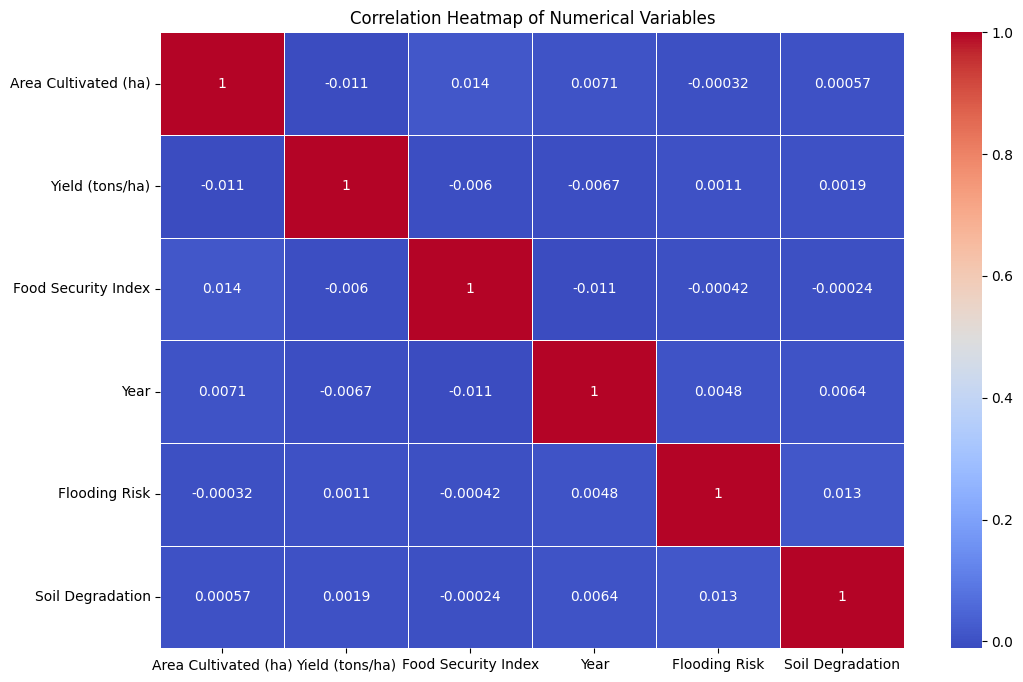

In [21]:
# Select only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Interpretation

The heatmap visualizes the correlations between numerical variables. High positive or negative correlations can indicate how certain factors influence each other. For example, a strong correlation between yield and food security index would reinforce the idea that improving crop yields is crucial for enhancing food security.

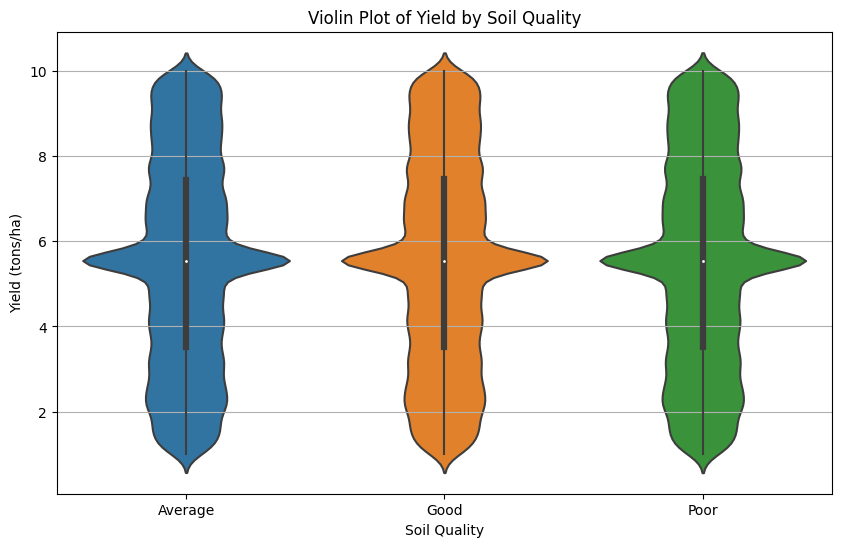

In [22]:
# Violin plot for Yield by Soil Quality
plt.figure(figsize=(10, 6))
sns.violinplot(x='Soil Quality', y='Yield (tons/ha)', data=df)
plt.title('Violin Plot of Yield by Soil Quality')
plt.ylabel('Yield (tons/ha)')
plt.xlabel('Soil Quality')
plt.grid(axis='y')
plt.show()


#### Interpretation

The violin plot provides insights into how yield varies with soil quality. It combines box plots with density plots to show the distribution of yields across different soil quality categories. This can help identify how soil conditions affect agricultural productivity.